In [1]:
import pickle
import numpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
f_all = open('movie_all_data_item', 'rb')
all_data = pickle.load(f_all)
f_all.close()

In [11]:
f_train = open('movie_train_data_item', 'rb')
train_data = pickle.load(f_train)
f_train.close()

In [12]:
f_test = open('movie_test_data_item', 'rb')
test_data = pickle.load(f_test)
f_test.close()

In [13]:
print len(all_data)
print len(train_data)
print len(test_data)

300388
255330
45058


In [14]:
#train_data=train_data[:300000]
#test_data=test_data[:300000]
for datum in all_data:
    if datum['helpful'][0]>datum['helpful'][1]:
        all_data.remove(datum)
        print '123'

In [15]:
item_time = {}
for datum in all_data:
    if datum['asin'] not in item_time.keys():
        item_time[datum['asin']] = []
    item_time[datum['asin']].append(datum['unixReviewTime'])

In [16]:
min_review_time={}
items_index=[]
for item in item_time.keys():
    items_index.append(item)
    min_review_time[item] = min(item_time[item])

In [17]:
review_duration = []
for item in item_time.keys():
    review_duration.append(float(max(item_time[item])-min(item_time[item]))/(3600*24*30))

In [18]:
len(review_duration)

2871

In [12]:
n,bins,patches = plt.hist(review_duration,48, facecolor='green')
plt.xlim([-5,115])
plt.xlabel("last review time - first review time (in months)")
plt.ylabel("number of items")
plt.title("histogram of [last review time - first review time]")
plt.xticks(numpy.arange(0,120,12))

([<matplotlib.axis.XTick at 0x42faa58>,
 <a list of 10 Text xticklabel objects>)

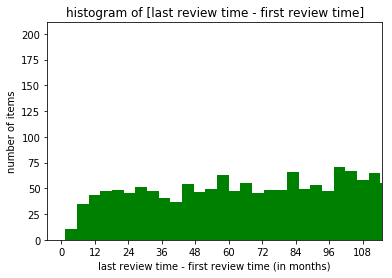

In [13]:
plt.savefig('Figure_durationOfReview')
plt.show()

In [14]:
all_data[0]

{'asin': 'B00008OSD9',
 'helpful': [1, 4],
 'overall': 4.0,
 'reviewText': '1st of all Mark Holten...Yes, Mark was the bully in The 1st Pee Wee movie...But Who in the hell knew what he was capable of? He\'s nicely seasoned now if I do say so myself...(I DO)! I love sickening movies..perverse (8mm)(7)etc... Yes, I agree w/ some as far as a chronicle type movie "documentary" this is not, and w/ that out of the way, this is a movie that keeps you thinking, and NOW Mark Holten\'s face is Gacy\'s to me, and I have to keep seperating the 2 when I\'m talking about or thinking about serial killers. His portrayal is that damn good! If you wanna get an idea of his character (personality) I like the book...The LAST VICTIM...it has a real-life almost intimately deadly encounter w/ a young guy who had balls enough to see Gacy alone...and POW his oh so friendly demeanor is shredded w/ his real personality, also there is letters written to this guy by Gacy. Anywho back to the movie. This movie was so

In [19]:
# split data based on [0,0] or not
zero_helpful = []
non_zero_helpful = []
for datum in all_data:
    if datum['helpful'] == [0,0]:
        zero_helpful.append(datum)
    else:
        non_zero_helpful.append(datum)

In [20]:
zero_helpful_index=[]
zero_helpful_rating=[]
count=[0]*6
for datum in zero_helpful:
    zero_helpful_index.append(datum['asin'])
    zero_helpful_rating.append(datum['overall'])
    if datum['overall'] == 0:
        count[0] += 1
    if datum['overall'] == 1:
        count[1] += 1
    if datum['overall'] == 2:
        count[2] += 1
    if datum['overall'] == 3:
        count[3] += 1
    if datum['overall'] == 4:
        count[4] += 1
    if datum['overall'] == 5:
        count[5] += 1
print count

[0, 896, 2565, 9674, 25047, 69943]


In [21]:
print len(zero_helpful)
print len(non_zero_helpful)

108125
192263


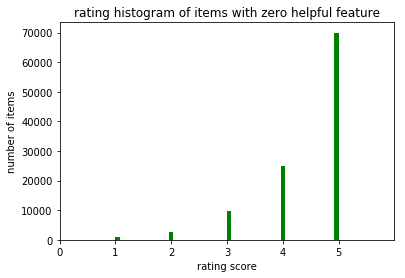

In [18]:
n,bins,patches = plt.hist(zero_helpful_rating,50,facecolor='green')
plt.xlim([0,6])
plt.xlabel("rating score")
plt.ylabel("number of items")
plt.title("rating histogram of items with zero helpful feature")
plt.xticks(numpy.arange(0,6,1))
plt.savefig('norm_zero_help_rating_histogram')
plt.show()

In [23]:
relative_time_non_zero = []
relative_time_zero = []
for datum in non_zero_helpful:
    relative_time_non_zero.append(float(datum['unixReviewTime']-min(item_time[datum['asin']]))/(3600*24*30))
for datum in zero_helpful:
    relative_time_zero.append(float(datum['unixReviewTime']-min(item_time[datum['asin']]))/(3600*24*30))

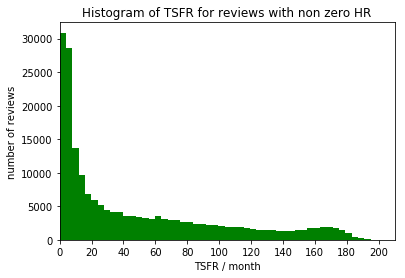

In [53]:
n,bins,patches = plt.hist(relative_time_non_zero,50,facecolor='green')
plt.xlim([0,210])
plt.xlabel("TSFR / month")
plt.ylabel("number of reviews")
plt.title("Histogram of TSFR for reviews with non zero HR")
plt.xticks(numpy.arange(0,220,20))
plt.savefig('non_zero_TSFR_histogram')
plt.show()

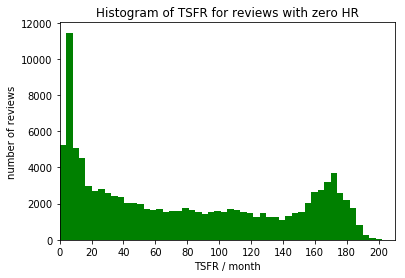

In [54]:
n,bins,patches = plt.hist(relative_time_zero,50,facecolor='green')
plt.xlim([0,210])
plt.xlabel("TSFR / month")
plt.ylabel("number of reviews")
plt.title("Histogram of TSFR for reviews with zero HR")
plt.xticks(numpy.arange(0,220,20))
plt.savefig('zero_TSFR_histogram')
plt.show()

In [55]:
test_length_non_zero = []
test_length_time_zero = []
for datum in non_zero_helpful:
    test_length_non_zero.append(len(datum['reviewText']))
for datum in zero_helpful:
    test_length_time_zero.append(len(datum['reviewText']))

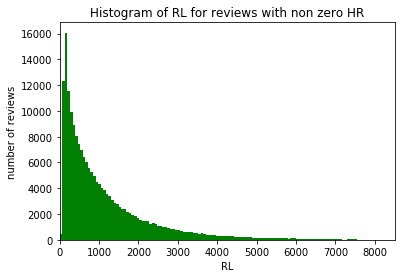

In [56]:
n,bins,patches = plt.hist(test_length_non_zero,500,facecolor='green')
plt.xlim([0,8500])
plt.xlabel("RL")
plt.ylabel("number of reviews")
plt.title("Histogram of RL for reviews with non zero HR")
plt.xticks(numpy.arange(0,8500,1000))
plt.savefig('non_zero_RL_histogram')
plt.show()

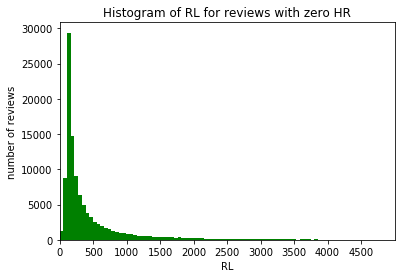

In [82]:
n,bins,patches = plt.hist(test_length_time_zero,500,facecolor='green')
plt.xlim([0,5000])
plt.xlabel("RL")
plt.ylabel("number of reviews")
plt.title("Histogram of RL for reviews with zero HR")
plt.xticks(numpy.arange(0,5000,500))
plt.savefig('zero_RL_histogram')
plt.show()

In [22]:
non_zero_helpful_index=[]
non_zero_helpful_rating=[]
non_zero_helpful_ratio=[]
non_zero_helpful_total=[]
count_rating_1_ratio=[]
count_rating_2_ratio=[]
count_rating_3_ratio=[]
count_rating_4_ratio=[]
count_rating_5_ratio=[]
count_rating_1_total=[]
count_rating_2_total=[]
count_rating_3_total=[]
count_rating_4_total=[]
count_rating_5_total=[]
count = [0]*6
non_zero_time_feature=[]
for datum in non_zero_helpful:
    non_zero_time_feature.append(float(datum['unixReviewTime']-min_review_time[datum['asin']])/(3600*24*30))
    non_zero_helpful_index.append(datum['asin'])
    non_zero_helpful_rating.append(datum['overall'])
    non_zero_helpful_ratio.append(float(datum['helpful'][0])/datum['helpful'][1])
    non_zero_helpful_total.append(datum['helpful'][1])
    if datum['overall'] == 0:
        count[0] += 1
    if datum['overall'] == 1:
        count[1] += 1
        count_rating_1_ratio.append(float(datum['helpful'][0])/datum['helpful'][1])
        count_rating_1_total.append(datum['helpful'][1])
    if datum['overall'] == 2:
        count[2] += 1
        count_rating_2_ratio.append(float(datum['helpful'][0])/datum['helpful'][1])
        count_rating_2_total.append(datum['helpful'][1])
    if datum['overall'] == 3:
        count[3] += 1
        count_rating_3_ratio.append(float(datum['helpful'][0])/datum['helpful'][1])
        count_rating_3_total.append(datum['helpful'][1])
    if datum['overall'] == 4:
        count[4] += 1
        count_rating_4_ratio.append(float(datum['helpful'][0])/datum['helpful'][1])
        count_rating_4_total.append(datum['helpful'][1])
    if datum['overall'] == 5:
        count[5] += 1
        count_rating_5_ratio.append(float(datum['helpful'][0])/datum['helpful'][1])
        count_rating_5_total.append(datum['helpful'][1])
print count

[0, 17366, 15326, 24790, 42633, 92148]


In [20]:
print sum(count)
print len(count_rating_1_total+count_rating_2_total+count_rating_3_total+count_rating_4_total+count_rating_5_total)

192263
192263


In [21]:
print max(count_rating_3_total)

660


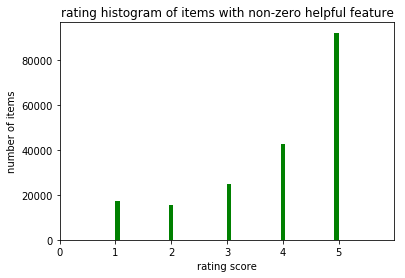

In [22]:
n,bins,patches = plt.hist(non_zero_helpful_rating,50, facecolor='green')
plt.xlim([0,6])
plt.xlabel("rating score")
plt.ylabel("number of items")
plt.title("rating histogram of items with non-zero helpful feature")
plt.xticks(numpy.arange(0,6,1))
plt.savefig('non_zero_help_rating_histogram')
plt.show()

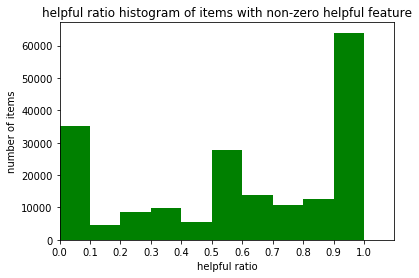

In [23]:
n,bins,patches = plt.hist(non_zero_helpful_ratio,10, facecolor='green')
plt.xlim([0,1.1])
plt.xlabel("helpful ratio")
plt.ylabel("number of items")
plt.title("helpful ratio histogram of items with non-zero helpful feature")
plt.xticks(numpy.arange(0,1.1,0.1))
plt.savefig('non_zero_help_ratio_histogram')
plt.show()

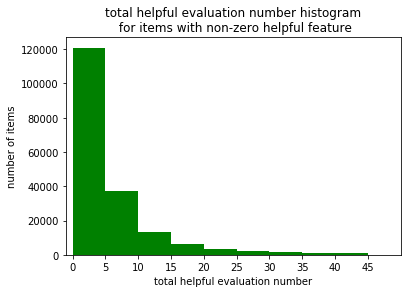

In [24]:
n,bins,patches = plt.hist(non_zero_helpful_total,bins = range(0,50,5), facecolor='green')
plt.xlim([-1,50])
plt.xlabel("total helpful evaluation number")
plt.ylabel("number of items")
plt.title("total helpful evaluation number histogram\n for items with non-zero helpful feature")
plt.xticks(numpy.arange(0,47,5))
plt.savefig('non_zero_help_total_evaluation_number_histogram')
plt.show()

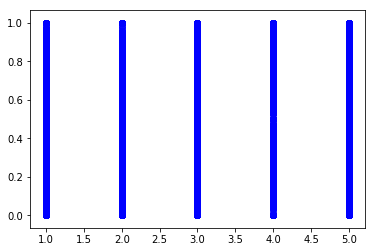

In [25]:
plt.scatter(non_zero_helpful_rating,non_zero_helpful_ratio,marker='o',color='b',alpha=0.5)
plt.show()

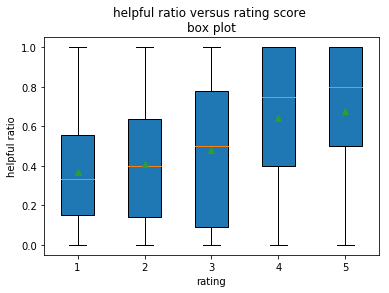

In [26]:
#plt.boxplot(non_zero_helpful_rating, notch=False, vert=True, patch_artist=True)
plt.xticks(numpy.arange(-1,6,1), ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])
rating_ratio = numpy.array([count_rating_1_ratio,count_rating_2_ratio,count_rating_3_ratio,count_rating_4_ratio,count_rating_5_ratio])
plt.boxplot(rating_ratio, notch=False, vert=True, patch_artist=True,showmeans=True)
#plt.boxplot(count_rating_1_ratio, notch=False, vert=True, patch_artist=True)
#plt.boxplot(count_rating_2_ratio, notch=False, vert=True, patch_artist=True)
#plt.boxplot(count_rating_3_ratio, notch=False, vert=True, patch_artist=True)
#plt.boxplot(count_rating_4_ratio, notch=False, vert=True, patch_artist=True)
#plt.boxplot(count_rating_5_ratio, notch=False, vert=True, patch_artist=True)
plt.ylabel('helpful ratio')
plt.xlabel('rating')
t = plt.title('helpful ratio versus rating score \nbox plot')
plt.savefig("helpful_ratio_vs_rating_box_plot")
plt.show()

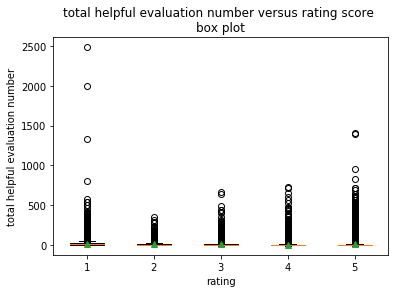

In [27]:
plt.xticks(numpy.arange(-1,6,1), ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])
rating_total = numpy.array([count_rating_1_total,count_rating_2_total,count_rating_3_total,count_rating_4_total,count_rating_5_total])
plt.boxplot(rating_total, notch=False, vert=True, patch_artist=True, showmeans=True)
plt.ylabel('total helpful evaluation number')
plt.xlabel('rating')
t = plt.title('total helpful evaluation number versus rating score \nbox plot')
plt.savefig("helpful_total_vs_rating_box_plot")
plt.show()

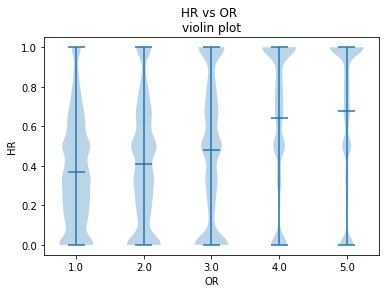

In [88]:
plt.xticks(numpy.arange(0,6,1), ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])
rating_ratio = numpy.array([count_rating_1_ratio,count_rating_2_ratio,count_rating_3_ratio,count_rating_4_ratio,count_rating_5_ratio])
plt.violinplot(rating_ratio, vert=True, showmeans=True)
plt.xlabel('OR')
plt.ylabel('HR')
t = plt.title('HR vs OR \nviolin plot')
plt.savefig("HR_vs_OR_violin_plot")
plt.show()

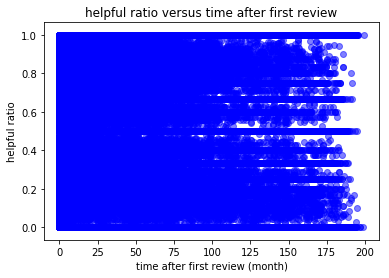

In [29]:
plt.scatter(non_zero_time_feature,non_zero_helpful_ratio,marker='o',color='b',alpha=0.5)
plt.xlabel('time after first review (month)')
plt.ylabel('helpful ratio')
plt.title('helpful ratio versus time after first review')
plt.savefig("helpful_ratio_vs_time_feature_plot")
plt.show()

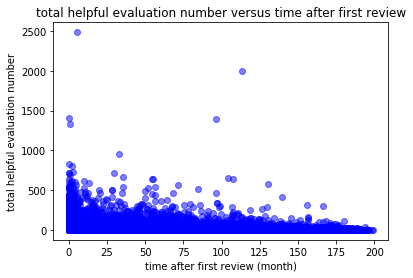

In [30]:
plt.scatter(non_zero_time_feature,non_zero_helpful_total,marker='o',color='b',alpha=0.5)
plt.xlabel('time after first review (month)')
plt.ylabel('total helpful evaluation number')
plt.title('total helpful evaluation number versus time after first review')
plt.savefig("helpful_total_vs_time_feature_plot")
plt.show()

In [31]:
# create time feature label
time_feature=[]
for datum in all_data:
    time_feature.append(float(datum['unixReviewTime']-min_review_time[datum['asin']])/(3600*24*30))

In [32]:
print time_feature[0]

29.2333333333


In [33]:
for datum in all_data:
    if datum['helpful'][1]!=0 and float(datum['helpful'][0])/datum['helpful'][1] > 1:
        all_data.remove(datum)

In [34]:
type(all_data)

list

In [95]:
non_zero_RL = []
non_zero_TSFR = []
non_zero_rating = []
non_zero_HR = []
for datum in non_zero_helpful:
    non_zero_RL.append(len(datum['reviewText']))
    non_zero_TSFR.append(float(datum['unixReviewTime']-min_review_time[datum['asin']])/(3600*24*30))
    non_zero_rating.append(datum['overall'])
    non_zero_HR.append(float(datum['helpful'][0])/datum['helpful'][1])

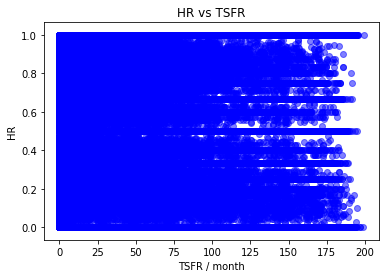

In [96]:
plt.scatter(non_zero_TSFR,non_zero_HR,marker='o',color='b',alpha=0.5)
plt.xlabel('TSFR / month')
plt.ylabel('HR')
plt.title('HR vs TSFR')
plt.savefig("HR_vs_TSFR")
plt.show()

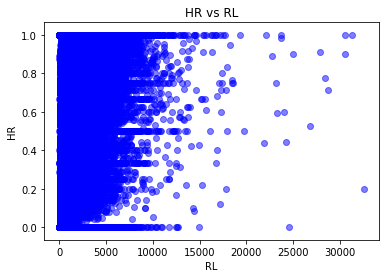

In [97]:
plt.scatter(non_zero_RL,non_zero_HR,marker='o',color='b',alpha=0.5)
plt.xlabel('RL')
plt.ylabel('HR')
plt.title('HR vs RL')
plt.savefig("HR_vs_RL")
plt.show()

### Filter 0<=HR<=0.2 and 0.8<=HR<=1.0

In [62]:
filtered_non_zero_helpful = []
for datum in non_zero_helpful:
    if float(datum['helpful'][0])/datum['helpful'][1]<=0.2 and float(datum['helpful'][0])/datum['helpful'][1]>=0:
        filtered_non_zero_helpful.append(datum)
    if float(datum['helpful'][0])/datum['helpful'][1]<=1.0 and float(datum['helpful'][0])/datum['helpful'][1]>=0.8:
        filtered_non_zero_helpful.append(datum)

In [66]:
OR = []
for datum in filtered_non_zero_helpful:
    OR.append(datum['overall'])
HR = []
rate_1_HR=[]
rate_2_HR=[]
rate_3_HR=[]
rate_4_HR=[]
rate_5_HR=[]
for datum in filtered_non_zero_helpful:
    HR.append(float(datum['helpful'][0])/datum['helpful'][1])
    if datum['overall'] == 1.0:
        rate_1_HR.append(float(datum['helpful'][0])/datum['helpful'][1])
    if datum['overall'] == 2.0:
        rate_2_HR.append(float(datum['helpful'][0])/datum['helpful'][1])
    if datum['overall'] == 3.0:
        rate_3_HR.append(float(datum['helpful'][0])/datum['helpful'][1])
    if datum['overall'] == 4.0:
        rate_4_HR.append(float(datum['helpful'][0])/datum['helpful'][1])
    if datum['overall'] == 5.0:
        rate_5_HR.append(float(datum['helpful'][0])/datum['helpful'][1])

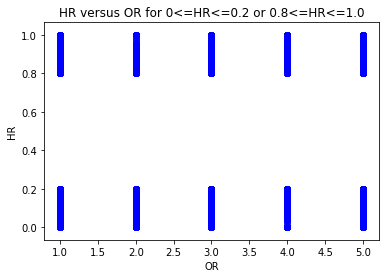

In [65]:
plt.scatter(OR,HR,marker='o',color='b',alpha=0.5)
plt.xlabel('OR')
plt.ylabel('HR')
plt.title('HR versus OR for 0<=HR<=0.2 or 0.8<=HR<=1.0')
plt.savefig("HR_vs_OR")
plt.show()

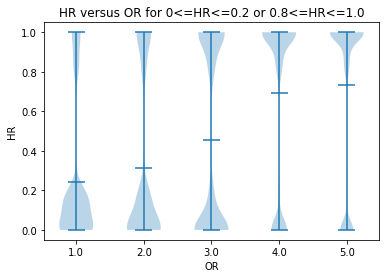

In [69]:
plt.xticks(numpy.arange(0,6,1), ['0.0', '1.0', '2.0', '3.0', '4.0', '5.0'])
rating_ratio = numpy.array([rate_1_HR,rate_2_HR,rate_3_HR,rate_4_HR,rate_5_HR])
plt.violinplot(rating_ratio, vert=True, showmeans=True)
plt.xlabel('OR')
plt.ylabel('HR')
t = plt.title('HR versus OR for 0<=HR<=0.2 or 0.8<=HR<=1.0')
plt.savefig("HR_vs_OR")
plt.show()

In [71]:
filtered_relative_time_non_zero = []
for datum in filtered_non_zero_helpful:
    filtered_relative_time_non_zero.append(float(datum['unixReviewTime']-min(item_time[datum['asin']]))/(3600*24*30))
filtered_test_length_non_zero = []
for datum in filtered_non_zero_helpful:
    filtered_test_length_non_zero.append(len(datum['reviewText']))

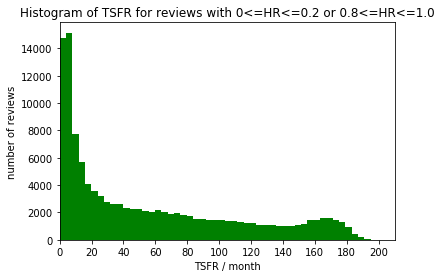

In [72]:
n,bins,patches = plt.hist(filtered_relative_time_non_zero,50,facecolor='green')
plt.xlim([0,210])
plt.xlabel("TSFR / month")
plt.ylabel("number of reviews")
plt.title("Histogram of TSFR for reviews with 0<=HR<=0.2 or 0.8<=HR<=1.0")
plt.xticks(numpy.arange(0,220,20))
plt.savefig('filtered_non_zero_TSFR_histogram')
plt.show()

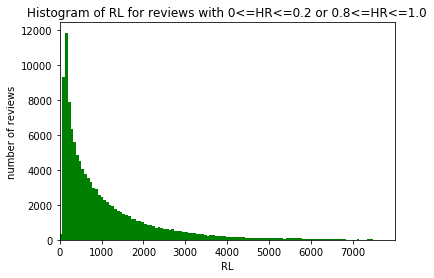

In [74]:
n,bins,patches = plt.hist(filtered_test_length_non_zero,500,facecolor='green')
plt.xlim([0,8000])
plt.xlabel("RL")
plt.ylabel("number of reviews")
plt.title("Histogram of RL for reviews with 0<=HR<=0.2 or 0.8<=HR<=1.0")
plt.xticks(numpy.arange(0,8000,1000))
plt.savefig('filtered_non_zero_RL_histogram')
plt.show()

In [85]:
for datum in all_data[:20]:
    print datum

{'reviewerID': 'A1III2G3CB8059', 'asin': 'B00008OSD9', 'helpful': [1, 4], 'reviewText': '1st of all Mark Holten...Yes, Mark was the bully in The 1st Pee Wee movie...But Who in the hell knew what he was capable of? He\'s nicely seasoned now if I do say so myself...(I DO)! I love sickening movies..perverse (8mm)(7)etc... Yes, I agree w/ some as far as a chronicle type movie "documentary" this is not, and w/ that out of the way, this is a movie that keeps you thinking, and NOW Mark Holten\'s face is Gacy\'s to me, and I have to keep seperating the 2 when I\'m talking about or thinking about serial killers. His portrayal is that damn good! If you wanna get an idea of his character (personality) I like the book...The LAST VICTIM...it has a real-life almost intimately deadly encounter w/ a young guy who had balls enough to see Gacy alone...and POW his oh so friendly demeanor is shredded w/ his real personality, also there is letters written to this guy by Gacy. Anywho back to the movie. This

In [100]:
reviewer = []
count=0
for datum in all_data:
    count+=1
    if count % 1000 ==0:
        print count
    if not datum['reviewerID'] in reviewer:
        reviewer.append(datum['reviewerID'])

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [101]:
print len(reviewer)

93985
